<h1> Load of Packages </h1>

In [1]:
#load packages
import numpy as np 
print('Numpy version: {}'. format(np.__version__))

import pandas as  pd 
print('Pandas version: {}'. format(pd.__version__))

import seaborn as sns
print('Seaborn version: {}'. format(sns.__version__))

import sys
print('Python version: {}'. format(sys.version))    

import math
from tabulate import tabulate
import plotly.express as px
import matplotlib.pyplot as plt
from pprint import pprint


Numpy version: 1.22.3
Pandas version: 1.4.2
Seaborn version: 0.11.2
Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


<h1> Data exploration and preprocessing</h1>

In [2]:

dataset = pd.read_csv('dataset.csv')


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15707 non-null  int64  
 1   listing_url                                   15707 non-null  object 
 2   scrape_id                                     15707 non-null  int64  
 3   last_scraped                                  15707 non-null  object 
 4   name                                          15697 non-null  object 
 5   description                                   15615 non-null  object 
 6   neighborhood_overview                         9188 non-null   object 
 7   picture_url                                   15707 non-null  object 
 8   host_id                                       15707 non-null  int64  
 9   host_url                                      15707 non-null 

In [4]:
print(dataset.keys())


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset = dataset.reindex(columns = ['neighbourhood_cleansed','neighbourhood_group_cleansed','latitude', 'longitude',
                                     'property_type','room_type',
                                     "accommodates","bedrooms","beds",
                                     "price"])

In [7]:
dataset.head(5)

neighbourhood_cleansed neighbourhood_group_cleansed  latitude  \
0                  la Sagrada Família                     Eixample  41.40556   
1               el Besòs i el Maresme                   Sant Martí  41.41291   
2  el Camp d'en Grassot i Gràcia Nova                       Gràcia  41.40566   
3                      el Barri Gòtic                 Ciutat Vella  41.37978   
4                      el Barri Gòtic                 Ciutat Vella  41.38170   

   longitude                    property_type        room_type  accommodates  \
0    2.17262               Entire rental unit  Entire home/apt             8   
1    2.22063               Entire rental unit  Entire home/apt             6   
2    2.17015               Entire rental unit  Entire home/apt             6   
3    2.17623               Entire rental unit  Entire home/apt             9   
4    2.17730  Private room in casa particular     Private room             2   

   bedrooms  beds    price  
0       3.0   6.0  $102.00  
1       3.0   4.0  $220.00  
2       2.0   3.0  $144.00  
3       4.0   6.0  $214.00  
4       1.0   1.0   $93.00

In [8]:
dataset.info()   # price column should be preprocessed and converted to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        15707 non-null  object 
 1   neighbourhood_group_cleansed  15707 non-null  object 
 2   latitude                      15707 non-null  float64
 3   longitude                     15707 non-null  float64
 4   property_type                 15707 non-null  object 
 5   room_type                     15707 non-null  object 
 6   accommodates                  15707 non-null  int64  
 7   bedrooms                      15114 non-null  float64
 8   beds                          15010 non-null  float64
 9   price                         15707 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [9]:
# remove dollar sign from price column
dataset['price'] = dataset['price'].str.replace('$','')
dataset['price'] = dataset['price'].str.replace(',','')
dataset['price'] = dataset['price'].astype(float, errors = 'raise')


C:\Users\Erion\AppData\Local\Temp\ipykernel_15540\2463899224.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['price'] = dataset['price'].str.replace('$','')


In [10]:
dataset.head(1) #dollar sign has been removed from price column

neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0     la Sagrada Família                     Eixample  41.40556    2.17262   

        property_type        room_type  accommodates  bedrooms  beds  price  
0  Entire rental unit  Entire home/apt             8       3.0   6.0  102.0

In [11]:
dataset.isnull().sum(axis = 0) 

neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                        593
beds                            697
price                             0
dtype: int64

In [12]:
np.set_printoptions(threshold=sys.maxsize) #print full numpy array
pd.set_option('display.max_rows', None) # no threshold for nr of rows to display
#https://pandas.pydata.org/docs/user_guide/options.html

In [13]:
dataset['bedrooms'].fillna((dataset['bedrooms'].median()), inplace=True)
dataset['beds'].fillna((dataset['beds'].median()), inplace=True)

In [14]:
dataset.drop(dataset[(dataset.price > 215) | (dataset.price == 0) 
                | (dataset.accommodates > 7) | (dataset.beds > 6) | (dataset.bedrooms > 3)].index, inplace = True)

In [15]:
dataset.shape[0]

13903

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 2 to 15706
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        13903 non-null  object 
 1   neighbourhood_group_cleansed  13903 non-null  object 
 2   latitude                      13903 non-null  float64
 3   longitude                     13903 non-null  float64
 4   property_type                 13903 non-null  object 
 5   room_type                     13903 non-null  object 
 6   accommodates                  13903 non-null  int64  
 7   bedrooms                      13903 non-null  float64
 8   beds                          13903 non-null  float64
 9   price                         13903 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [17]:
dataset[["accommodates","bedrooms","beds","price"]].describe()

accommodates      bedrooms          beds         price
count  13903.000000  13903.000000  13903.000000  13903.000000
mean       2.917572      1.443429      2.009135     70.878228
std        1.579649      0.681531      1.228288     43.418832
min        1.000000      1.000000      1.000000      8.000000
25%        2.000000      1.000000      1.000000     36.000000
50%        2.000000      1.000000      2.000000     60.000000
75%        4.000000      2.000000      3.000000     97.000000
max        7.000000      3.000000      6.000000    215.000000

In [18]:
dataset.describe(include=['object'])



neighbourhood_cleansed neighbourhood_group_cleansed  \
count                    13903                        13903   
unique                      71                           10   
top     la Dreta de l'Eixample                     Eixample   
freq                      1528                         4648   

             property_type        room_type  
count                13903            13903  
unique                  55                4  
top     Entire rental unit  Entire home/apt  
freq                  5903             6856

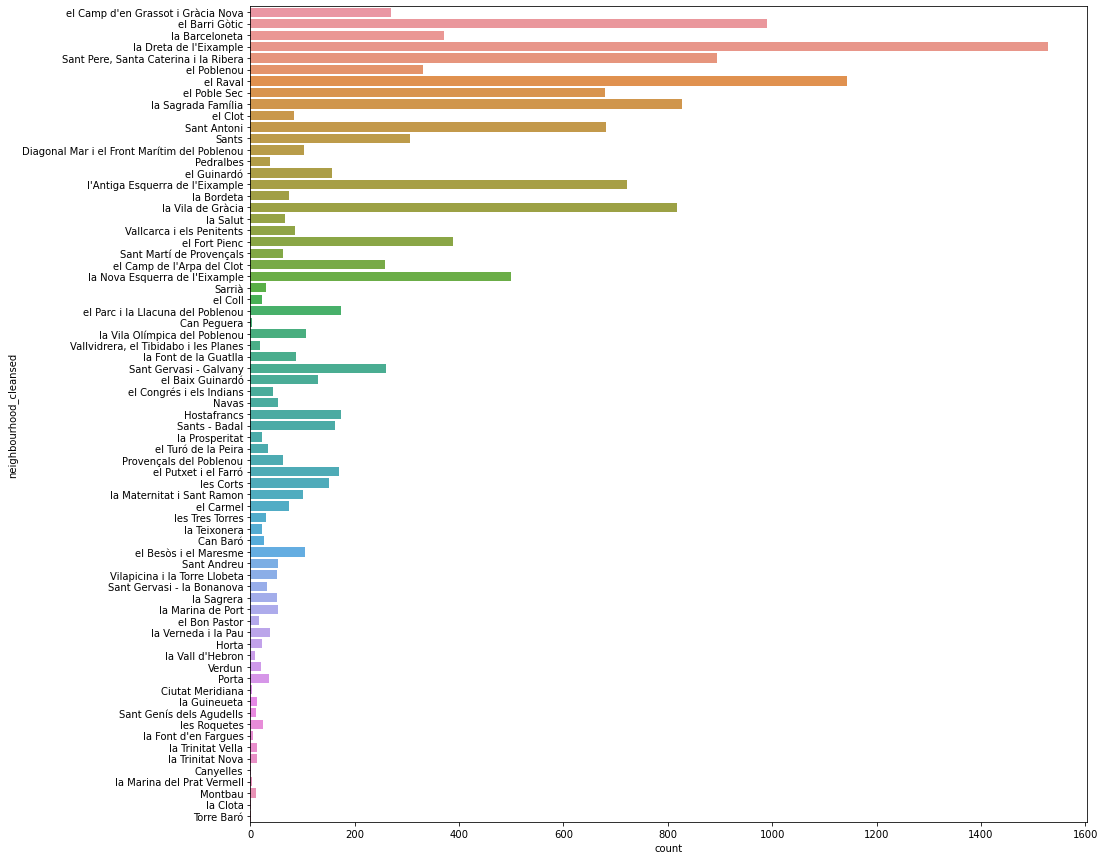

In [19]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y="neighbourhood_cleansed",  data=dataset)

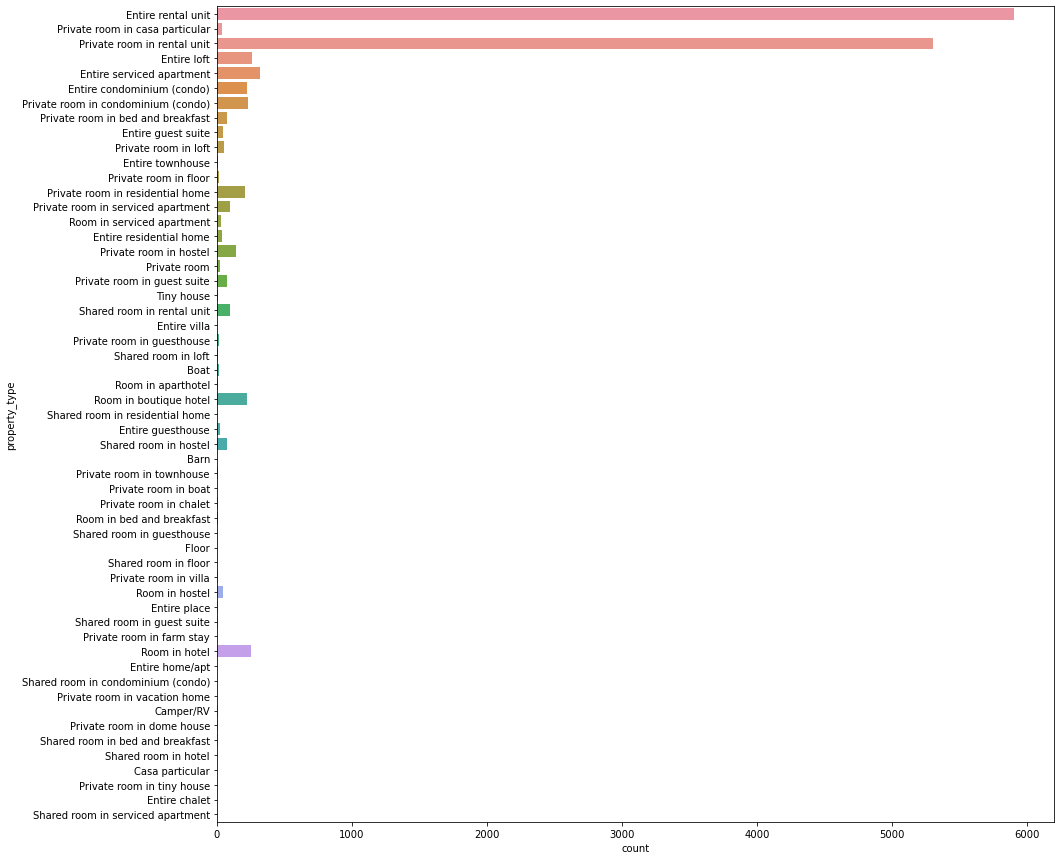

In [20]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y="property_type",  data=dataset)

In [21]:
dataset.pop('neighbourhood_cleansed')

2                  el Camp d'en Grassot i Gràcia Nova
4                                      el Barri Gòtic
5                                      la Barceloneta
6                              la Dreta de l'Eixample
7                  el Camp d'en Grassot i Gràcia Nova
8               Sant Pere, Santa Caterina i la Ribera
9                  el Camp d'en Grassot i Gràcia Nova
10                             la Dreta de l'Eixample
11                                     el Barri Gòtic
13                             la Dreta de l'Eixample
14                                        el Poblenou
15                                           el Raval
17                                       el Poble Sec
18                                       el Poble Sec
19                                 la Sagrada Família
20                                            el Clot
21                                       el Poble Sec
22                                        Sant Antoni
24              Sant Pere, S

In [22]:
dataset.pop('property_type')


2                         Entire rental unit
4            Private room in casa particular
5                Private room in rental unit
6                                Entire loft
7                         Entire rental unit
8                         Entire rental unit
9                         Entire rental unit
10                        Entire rental unit
11               Private room in rental unit
13                        Entire rental unit
14                 Entire serviced apartment
15                        Entire rental unit
17                        Entire rental unit
18                        Entire rental unit
19                        Entire rental unit
20                        Entire rental unit
21                        Entire rental unit
22               Private room in rental unit
24               Private room in rental unit
25                Entire condominium (condo)
27                        Entire rental unit
29                        Entire rental unit
30        

In [23]:
dataset.head(5)   

neighbourhood_group_cleansed  latitude  longitude        room_type  \
2                       Gràcia  41.40566    2.17015  Entire home/apt   
4                 Ciutat Vella  41.38170    2.17730     Private room   
5                 Ciutat Vella  41.38043    2.19094     Private room   
6                     Eixample  41.39631    2.16832  Entire home/apt   
7                       Gràcia  41.40568    2.16943  Entire home/apt   

   accommodates  bedrooms  beds  price  
2             6       2.0   3.0  144.0  
4             2       1.0   1.0   93.0  
5             1       1.0   1.0   36.0  
6             4       1.0   1.0   50.0  
7             6       2.0   4.0  110.0

In [24]:
dataset[dataset.price == 0].shape[0]

0

In [25]:
dataset[dataset.price == 0]

Empty DataFrame
Columns: [neighbourhood_group_cleansed, latitude, longitude, room_type, accommodates, bedrooms, beds, price]
Index: []

In [26]:
dataset.head()

neighbourhood_group_cleansed  latitude  longitude        room_type  \
2                       Gràcia  41.40566    2.17015  Entire home/apt   
4                 Ciutat Vella  41.38170    2.17730     Private room   
5                 Ciutat Vella  41.38043    2.19094     Private room   
6                     Eixample  41.39631    2.16832  Entire home/apt   
7                       Gràcia  41.40568    2.16943  Entire home/apt   

   accommodates  bedrooms  beds  price  
2             6       2.0   3.0  144.0  
4             2       1.0   1.0   93.0  
5             1       1.0   1.0   36.0  
6             4       1.0   1.0   50.0  
7             6       2.0   4.0  110.0

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

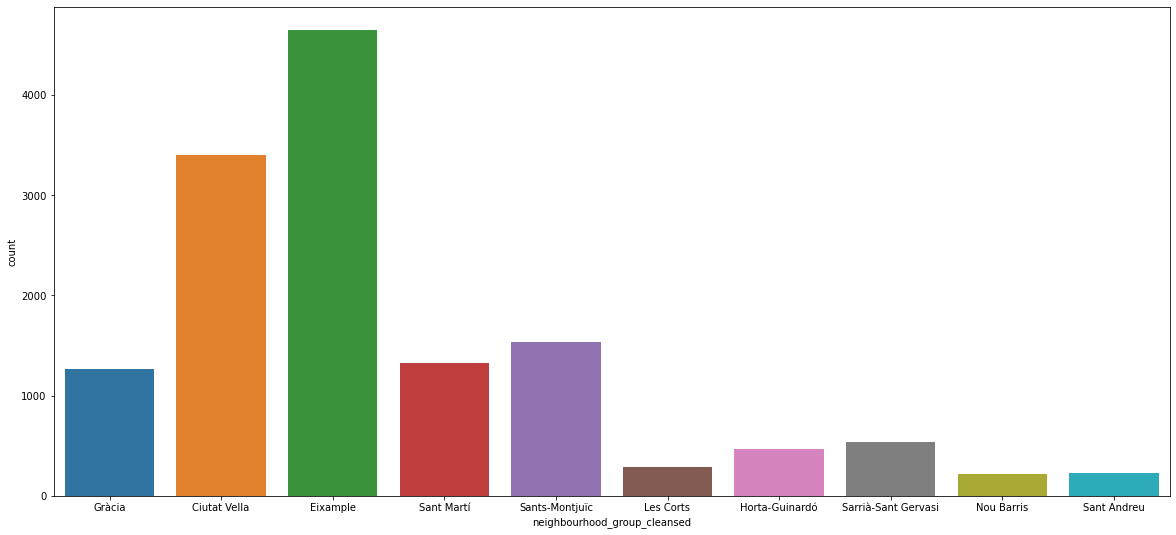

In [27]:
plt.figure(figsize=(20,9))
sns.countplot(x=dataset['neighbourhood_group_cleansed'])

<AxesSubplot:xlabel='room_type', ylabel='count'>

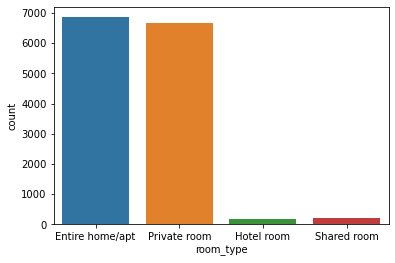

In [28]:
sns.countplot(x=dataset['room_type'])

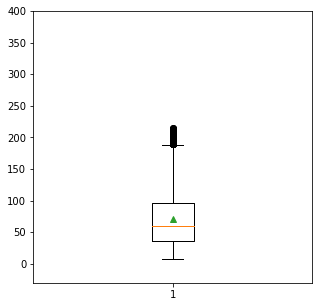

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
plt.ylim(-30, 400)

bp = plt.boxplot(dataset['price'],showmeans=True)
plt.show()

In [30]:
print('Exact values from boxplot :\n')

medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2] #
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]

print(f'Medians: {medians}\n'
      f'Means: {means}\n'
      f'Minimums: {minimums}\n'
      f'Maximums: {maximums}')

boxplot_stats_array = []
for  median ,mean, minimum, maximum in zip(medians,means,minimums,maximums ):
    array = [median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
    
print('\n')
print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))


Exact values from boxplot :

Medians: [60.0]
Means: [70.87822772063583]
Minimums: [8.0]
Maximums: [188.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
      60  70.8782          8        188


In [31]:
dataset[(dataset.price > 215)].shape[0] 


0

In [32]:
dataset[(dataset.price == 0)].shape[0] 


0

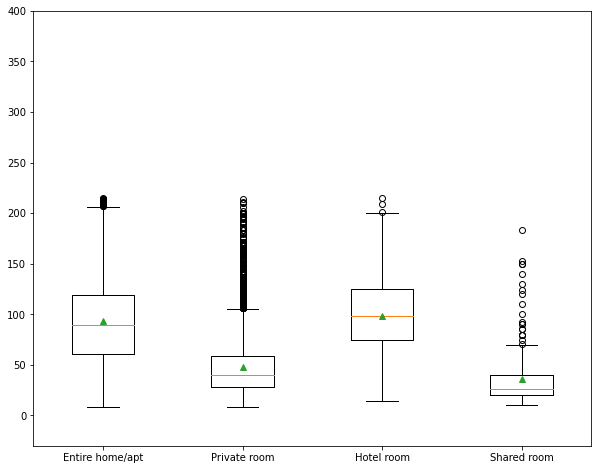

In [33]:
room_types = dataset['room_type'].unique()
data_boxes_array = []
data_lables_array = []
for room_type_var in room_types:
    data_box = dataset[dataset.room_type == room_type_var]
    data_boxes_array.append(data_box['price'])
    data_lables_array.append(room_type_var)
    
fig, ax = plt.subplots(figsize=(10,8))
plt.ylim(-30, 400)

bp = plt.boxplot(data_boxes_array, labels = data_lables_array,showmeans=True)
plt.show()


In [34]:
medians = []
means = []
minimums = []
maximums = []

medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array = []
for label, median ,mean, minimum, maximum in zip(data_lables_array,medians,means,minimums,maximums ):
    array = [label,median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
print(tabulate(boxplot_stats_array, headers=["Room type", "Median", "Mean", "Minimum", "Maximum"]))

Room type          Median     Mean    Minimum    Maximum
---------------  --------  -------  ---------  ---------
Entire home/apt        89  93.3746          8        206
Private room           40  48.0427          8        105
Hotel room             98  98.5899         14        200
Shared room            26  36.3737         10         70


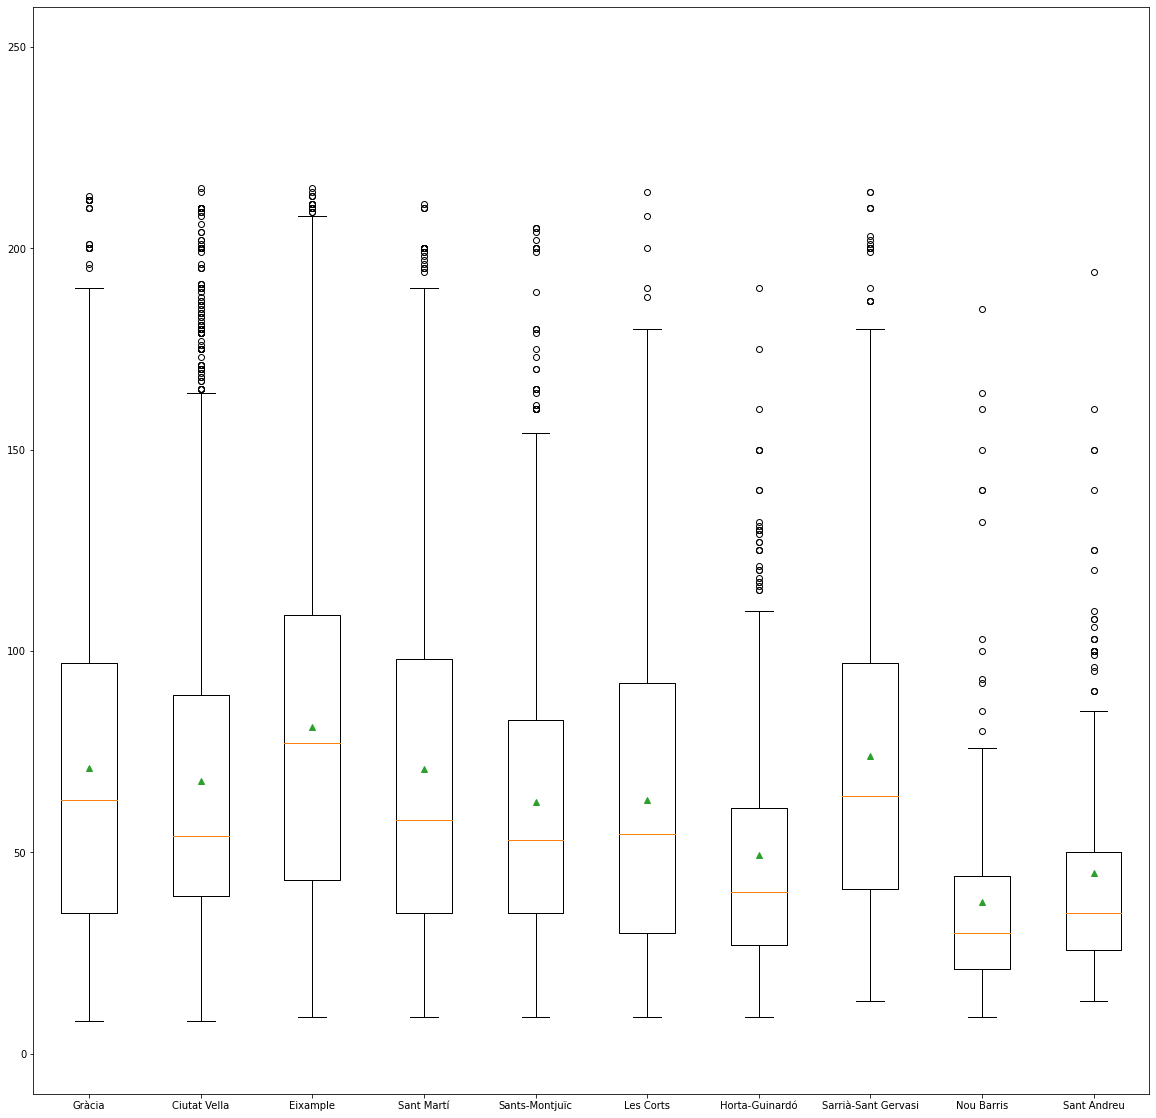

In [35]:
neighborhood_groups_array = dataset['neighbourhood_group_cleansed'].unique()
data_boxes_neighbourhood_group_array = []
data_lables_neighbourhood_group_array = []
for neighbourhood_group_item in neighborhood_groups_array:
    data_box = dataset[dataset.neighbourhood_group_cleansed == neighbourhood_group_item]
    data_boxes_neighbourhood_group_array.append(data_box['price'])
    data_lables_neighbourhood_group_array.append(neighbourhood_group_item)
    
fig, ax = plt.subplots(figsize=(20,20))
plt.ylim(-10, 260)
bp = plt.boxplot(data_boxes_neighbourhood_group_array, labels = data_lables_neighbourhood_group_array,showmeans=True)
plt.show()    


In [36]:
medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array_neighborhood = []
for label, median ,mean, minimum, maximum in zip(data_lables_neighbourhood_group_array,medians,means,minimums,maximums ):
    array = [label,median,mean, minimum, maximum]
    boxplot_stats_array_neighborhood.append(array)
print(tabulate(boxplot_stats_array_neighborhood, headers=["Neighbourhood_group", "Median", "Mean", "Minimum", "Maximum"]))

Neighbourhood_group      Median     Mean    Minimum    Maximum
---------------------  --------  -------  ---------  ---------
Gràcia                     63    70.9937          8        190
Ciutat Vella               54    67.7906          8        164
Eixample                   77    81.0751          9        208
Sant Martí                 58    70.5961          9        190
Sants-Montjuïc             53    62.5481          9        154
Les Corts                  54.5  62.9479          9        180
Horta-Guinardó             40    49.3578          9        110
Sarrià-Sant Gervasi        64    73.931          13        180
Nou Barris                 30    37.5092          9         76
Sant Andreu                35    44.7807         13         85


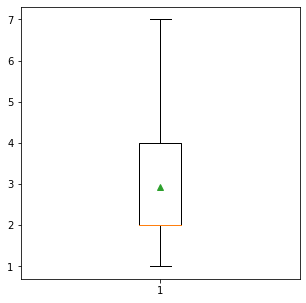

In [37]:
fig = plt.figure(figsize =(5, 5))

bp=plt.boxplot(dataset['accommodates'],showmeans=True) # Creating plot
 
plt.show() # show plot


In [38]:
medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array = []
for  median ,mean, minimum, maximum in zip(medians,means,minimums,maximums ):
    array = [median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))

  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       2  2.91757          1          7


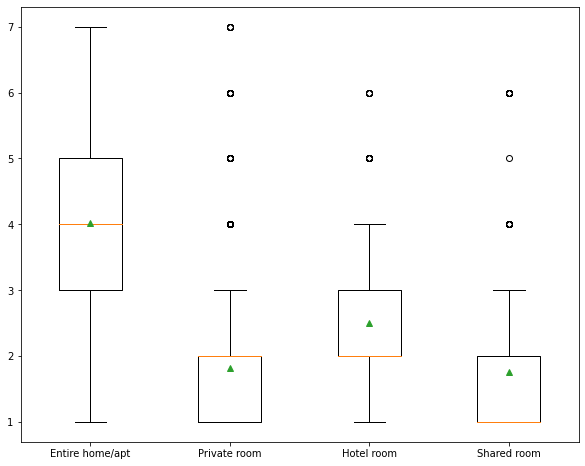

In [39]:
room_types = dataset['room_type'].unique()
data_boxes_array = []
data_lables_array = []
for room_type_var in room_types:
    data_box = dataset[dataset.room_type == room_type_var]
    data_boxes_array.append(data_box['accommodates'])
    data_lables_array.append(room_type_var)
    
fig, ax = plt.subplots(figsize=(10,8))

bp = plt.boxplot(data_boxes_array, labels = data_lables_array,showmeans=True)
plt.show()

In [40]:
medians = []
means = []
minimums = []
maximums = []

medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array = []
for label, median ,mean, minimum, maximum in zip(data_lables_array,medians,means,minimums,maximums ):
    array = [label,median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
print(tabulate(boxplot_stats_array, headers=["Room type", "Median", "Mean", "Minimum", "Maximum"]))

Room type          Median     Mean    Minimum    Maximum
---------------  --------  -------  ---------  ---------
Entire home/apt         4  4.02348          1          7
Private room            2  1.82656          1          3
Hotel room              2  2.50562          1          4
Shared room             1  1.75253          1          3


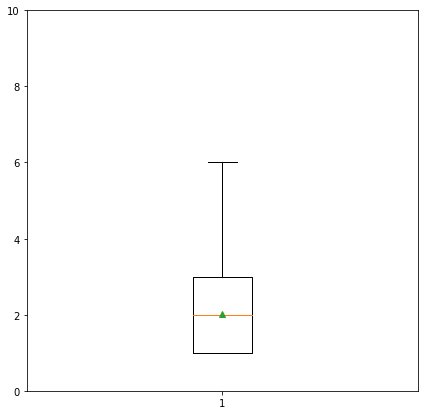

In [41]:
fig = plt.figure(figsize =(7, 7))
plt.ylim(0, 10)

bp = plt.boxplot(dataset['beds'],showmeans=True) # Creating plot 

plt.show() # show plot


In [42]:
medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array = []
for  median ,mean, minimum, maximum in zip(medians,means,minimums,maximums ):
    array = [median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))

  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       2  2.00913          1          6


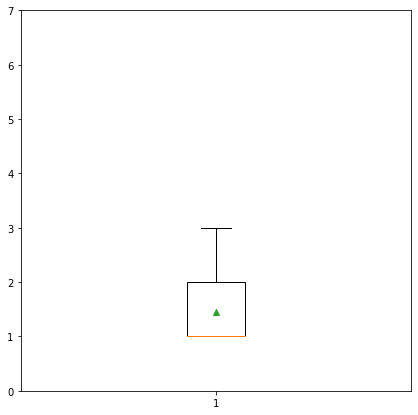

In [43]:
fig = plt.figure(figsize =(7, 7))
plt.ylim(0, 7)

bp = plt.boxplot(dataset['bedrooms'],showmeans=True) # Creating plot 

plt.show() # show plot

In [44]:
medians = [item.get_ydata()[0] for item in bp['medians']]
means = [item.get_ydata()[0] for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
boxplot_stats_array = []
for  median ,mean, minimum, maximum in zip(medians,means,minimums,maximums ):
    array = [median,mean, minimum, maximum]
    boxplot_stats_array.append(array)
print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))

  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
       1  1.44343          1          3


In [45]:
dataset.head(1)


neighbourhood_group_cleansed  latitude  longitude        room_type  \
2                       Gràcia  41.40566    2.17015  Entire home/apt   

   accommodates  bedrooms  beds  price  
2             6       2.0   3.0  144.0

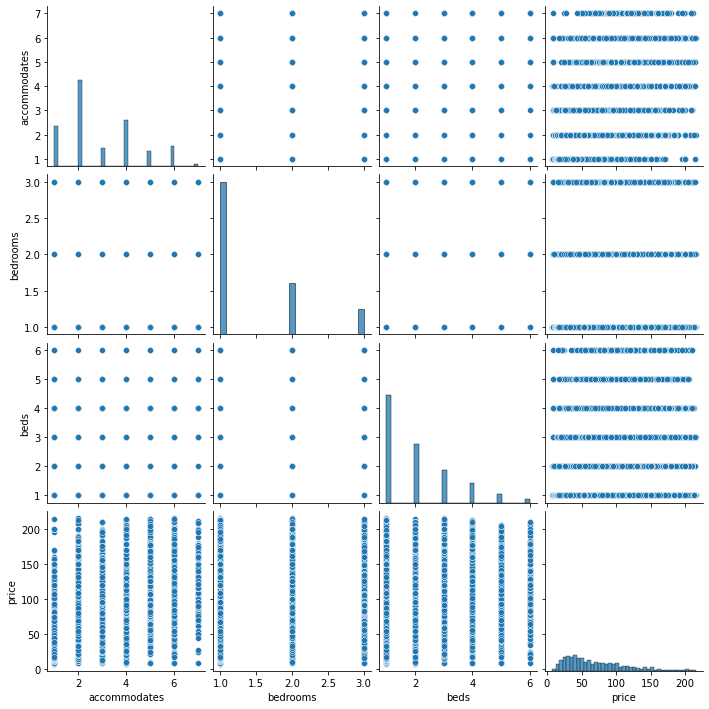

In [46]:
sns.pairplot(dataset[['accommodates','bedrooms','beds','price']])

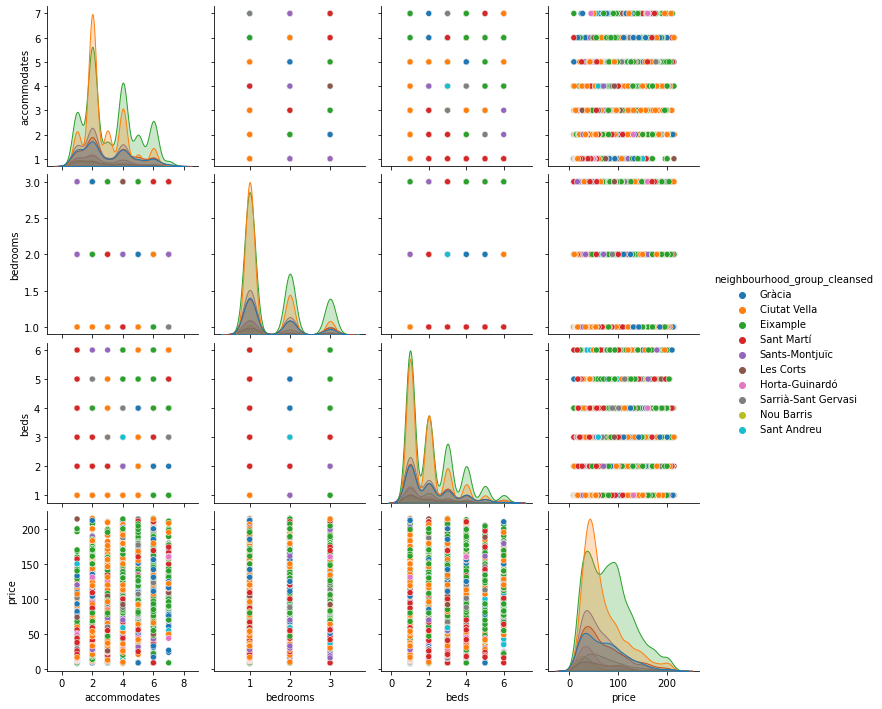

In [47]:
sns.pairplot(dataset[['accommodates','bedrooms','beds','price','neighbourhood_group_cleansed']], 
             hue='neighbourhood_group_cleansed')

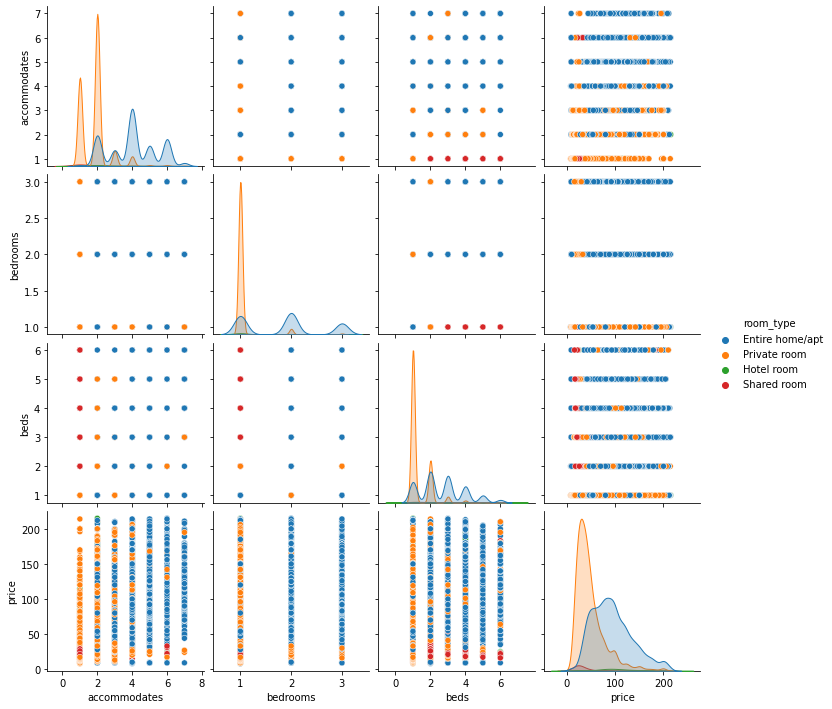

In [48]:
sns.pairplot(dataset[['accommodates','bedrooms','beds','price','room_type']], hue='room_type')

In [49]:

px.set_mapbox_access_token("pk.eyJ1IjoiZXJpb25hb3NhajEyMyIsImEiOiJjbDU1YXVjeDkxN2lxM2NyeTFqczJ0ajBuIn0.676otXTVfsk9R_tuMysd9A")
fig = px.scatter_mapbox(dataset, lat="latitude", lon="longitude",color="neighbourhood_group_cleansed", 
                        size="price",size_max=20,zoom=12)
fig.show()

In [50]:
fig = px.scatter_mapbox(dataset, lat="latitude", lon="longitude",color="room_type", size="price",
                   size_max=20,zoom=12, mapbox_style='open-street-map')
fig.show()


In [51]:

dataset.drop(dataset[(dataset.price > 215) | (dataset.price == 0) |
                     (dataset.accommodates > 7) | (dataset.beds > 6) | (dataset.bedrooms > 3)].index, inplace = True)
dataset.shape[0]

13903

In [52]:
dataset.shape[0]

13903

In [53]:
dataset.drop('latitude', axis = 1, inplace =True)
dataset.drop('longitude', axis = 1, inplace =True)

In [54]:
X = dataset.drop('price',axis = 1).copy()
y = dataset['price'].copy()

In [55]:
#one hot enocding   neighbourhood_group_cleansed and room_type
X_encoded = pd.get_dummies(X,columns=['neighbourhood_group_cleansed','room_type'])
X_encoded.head()

accommodates  bedrooms  beds  neighbourhood_group_cleansed_Ciutat Vella  \
2             6       2.0   3.0                                          0   
4             2       1.0   1.0                                          1   
5             1       1.0   1.0                                          1   
6             4       1.0   1.0                                          0   
7             6       2.0   4.0                                          0   

   neighbourhood_group_cleansed_Eixample  neighbourhood_group_cleansed_Gràcia  \
2                                      0                                    1   
4                                      0                                    0   
5                                      0                                    0   
6                                      1                                    0   
7                                      0                                    1   

   neighbourhood_group_cleansed_Horta-Guinardó  \
2                                            0   
4                                            0   
5                                            0   
6                                            0   
7                                            0   

   neighbourhood_group_cleansed_Les Corts  \
2                                       0   
4                                       0   
5                                       0   
6                                       0   
7                                       0   

   neighbourhood_group_cleansed_Nou Barris  \
2                                        0   
4                                        0   
5                                        0   
6                                        0   
7                                        0   

   neighbourhood_group_cleansed_Sant Andreu  \
2                                         0   
4                                         0   
5                                         0   
6                                         0   
7                                         0   

   neighbourhood_group_cleansed_Sant Martí  \
2                                        0   
4                                        0   
5                                        0   
6                                        0   
7                                        0   

   neighbourhood_group_cleansed_Sants-Montjuïc  \
2                                            0   
4                                            0   
5                                            0   
6                                            0   
7                                            0   

   neighbourhood_group_cleansed_Sarrià-Sant Gervasi  \
2                                                 0   
4                                                 0   
5                                                 0   
6                                                 0   
7                                                 0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
2                          1                     0                       0   
4                          0                     0                       1   
5                          0                     0                       1   
6                          1                     0                       0   
7                          1                     0                       0   

   room_type_Shared room  
2                      0  
4                      0  
5                      0  
6                      0  
7                      0

In [56]:
X_encoded.head(1)

accommodates  bedrooms  beds  neighbourhood_group_cleansed_Ciutat Vella  \
2             6       2.0   3.0                                          0   

   neighbourhood_group_cleansed_Eixample  neighbourhood_group_cleansed_Gràcia  \
2                                      0                                    1   

   neighbourhood_group_cleansed_Horta-Guinardó  \
2                                            0   

   neighbourhood_group_cleansed_Les Corts  \
2                                       0   

   neighbourhood_group_cleansed_Nou Barris  \
2                                        0   

   neighbourhood_group_cleansed_Sant Andreu  \
2                                         0   

   neighbourhood_group_cleansed_Sant Martí  \
2                                        0   

   neighbourhood_group_cleansed_Sants-Montjuïc  \
2                                            0   

   neighbourhood_group_cleansed_Sarrià-Sant Gervasi  \
2                                                 0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
2                          1                     0                       0   

   room_type_Shared room  
2                      0

<h1> Prediction and testing</h1>


In [58]:
#packages used in model training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
import time
import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import absolute


C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42,shuffle = True)

In [60]:
baseline_regressor = DummyRegressor(strategy='median')
baseline_regressor.fit(X_train, y_train)
baseline_predictions = baseline_regressor.predict(X_test)
mae = mean_absolute_error(y_test, baseline_predictions)
mse = mean_squared_error(y_test, baseline_predictions)
print("Mean absolute error for base model:",mae)
print("Mean squared error for base model:",mse)

Mean absolute error for base model: 33.922320786382166
Mean squared error for base model: 1942.0326060896668


In [61]:
# define the values for the hyperparameters you want to search over
param_grid = {
    'max_depth': [5, 7,9],
    'learning_rate': [.3, .1, .05, .01, .06 , .005],
    'n_estimators': [700],  
    'min_child_weight': [5, 6, 7, 8]
}

# create an XGBoost regressor
xgb_reg = XGBRegressor()

# create a grid search object using the defined values for the hyperparameters
grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, n_jobs=-1, verbose=2)

start = time.perf_counter()

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

end = time.perf_counter()

# print the best hyperparameters found by the grid search
print("Best parameters :", grid_search.best_params_)
print("Finished for:", end//60, 'minutes')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Best parameters : {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 700}
Finished for: 166.0 minutes


In [62]:
best_params_regressor = XGBRegressor(learning_rate=0.01, n_estimators=700, min_child_weight=7, max_depth=5 )

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
best_model_scores = cross_val_score(best_params_regressor, X_train, y_train, scoring='neg_mean_absolute_error', 
                                       cv=cv, n_jobs=-1,
                                       error_score='raise')
best_model_scores = absolute(best_model_scores)
print('Best model validation: %.3f (%.3f)' % (mean(best_model_scores), std(best_model_scores)))


Best model validation: 25.036 (0.544)


In [63]:
best_params_regressor.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])
predictions=  best_params_regressor.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
num_boosting_rounds = best_params_regressor.best_iteration
print("Mean absolute error :",mae)
print("Mean squared error :",mse)
print("Number of boosting rounds: ", num_boosting_rounds)

[0]	validation_0-rmse:81.29683
[1]	validation_0-rmse:80.61716
[2]	validation_0-rmse:79.94473
[3]	validation_0-rmse:79.28039
[4]	validation_0-rmse:78.62442
[5]	validation_0-rmse:77.97437
[6]	validation_0-rmse:77.33219
[7]	validation_0-rmse:76.69852
[8]	validation_0-rmse:76.07188
[9]	validation_0-rmse:75.45231
[10]	validation_0-rmse:74.83987
[11]	validation_0-rmse:74.23603
[12]	validation_0-rmse:73.63780
[13]	validation_0-rmse:73.04670
[14]	validation_0-rmse:72.46278
[15]	validation_0-rmse:71.88688
[16]	validation_0-rmse:71.31738
[17]	validation_0-rmse:70.75459
[18]	validation_0-rmse:70.19844
[19]	validation_0-rmse:69.65050
[20]	validation_0-rmse:69.10802
[21]	validation_0-rmse:68.57191
[22]	validation_0-rmse:68.04330
[23]	validation_0-rmse:67.52206
[24]	validation_0-rmse:67.00575
[25]	validation_0-rmse:66.49588
[26]	validation_0-rmse:65.99370
[27]	validation_0-rmse:65.49665
[28]	validation_0-rmse:65.00584
[29]	validation_0-rmse:64.52101
[30]	validation_0-rmse:64.04366
[31]	validation_0-

[252]	validation_0-rmse:33.40418
[253]	validation_0-rmse:33.39376
[254]	validation_0-rmse:33.38393
[255]	validation_0-rmse:33.37407
[256]	validation_0-rmse:33.36430
[257]	validation_0-rmse:33.35501
[258]	validation_0-rmse:33.34576
[259]	validation_0-rmse:33.33658
[260]	validation_0-rmse:33.32760
[261]	validation_0-rmse:33.31867
[262]	validation_0-rmse:33.30940
[263]	validation_0-rmse:33.30119
[264]	validation_0-rmse:33.29305
[265]	validation_0-rmse:33.28423
[266]	validation_0-rmse:33.27570
[267]	validation_0-rmse:33.26701
[268]	validation_0-rmse:33.25950
[269]	validation_0-rmse:33.25232
[270]	validation_0-rmse:33.24425
[271]	validation_0-rmse:33.23730
[272]	validation_0-rmse:33.22949
[273]	validation_0-rmse:33.22275
[274]	validation_0-rmse:33.21627
[275]	validation_0-rmse:33.20898
[276]	validation_0-rmse:33.20172
[277]	validation_0-rmse:33.19553
[278]	validation_0-rmse:33.18948
[279]	validation_0-rmse:33.18245
[280]	validation_0-rmse:33.17683
[281]	validation_0-rmse:33.17125
[282]	vali

[501]	validation_0-rmse:32.86813
[502]	validation_0-rmse:32.86814
[503]	validation_0-rmse:32.86771
[504]	validation_0-rmse:32.86776
[505]	validation_0-rmse:32.86776
[506]	validation_0-rmse:32.86770
[507]	validation_0-rmse:32.86758
[508]	validation_0-rmse:32.86764
[509]	validation_0-rmse:32.86729
[510]	validation_0-rmse:32.86691
[511]	validation_0-rmse:32.86650
[512]	validation_0-rmse:32.86646
[513]	validation_0-rmse:32.86597
[514]	validation_0-rmse:32.86614
[515]	validation_0-rmse:32.86576
[516]	validation_0-rmse:32.86646
[517]	validation_0-rmse:32.86640
[518]	validation_0-rmse:32.86659
[519]	validation_0-rmse:32.86663
[520]	validation_0-rmse:32.86591
[521]	validation_0-rmse:32.86586
[522]	validation_0-rmse:32.86667
[523]	validation_0-rmse:32.86663
[524]	validation_0-rmse:32.86629
[525]	validation_0-rmse:32.86711
Mean absolute error : 24.225269037309353
Mean squared error : 1080.1581092087579
Number of boosting rounds:  515


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

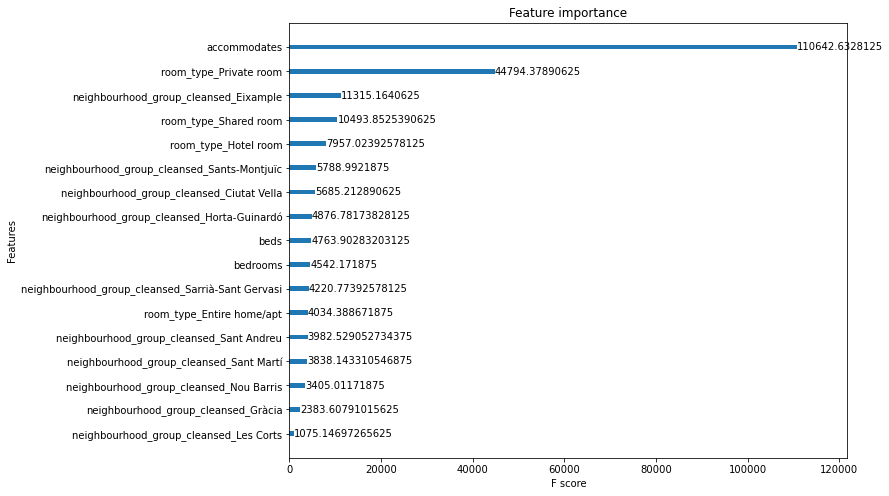

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(best_params_regressor, importance_type='gain', ax = ax, grid = False)

In [65]:
graph = xgb.to_graphviz(best_params_regressor, num_trees=-1) 
graph.render('prediction_tree')

'prediction_tree.pdf'

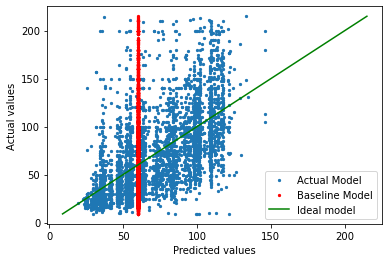

In [66]:
plt.scatter(predictions, y_test, s=5, label = 'Actual Model')
plt.scatter(baseline_predictions, y_test, s=5, label = 'Baseline Model',  color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green',label = 'Ideal model')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()